In [36]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych<H1>

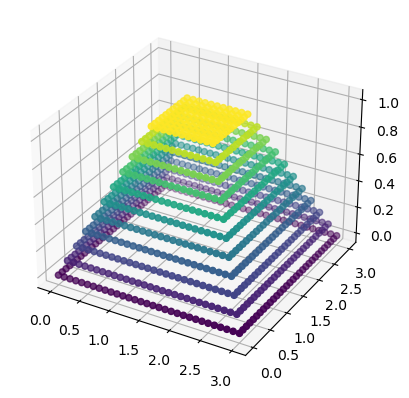

In [37]:
x = np.arange(0, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY = np.column_stack((dataX,dataY))

data_labels = []
for x, y in zip(dataX, dataY):
    x-=1.5
    y-=1.5
    data_labels.append( abs(x) if (y<x and y>-x) or (y>x and y<-x)  else abs(y) ) 
data_labels=np.array(data_labels)
#data_labels[data_labels>1.5] = 1.5
data_labels=abs(data_labels-1.5)
data_labels[data_labels>1] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataX, dataY, data_labels, c=data_labels)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

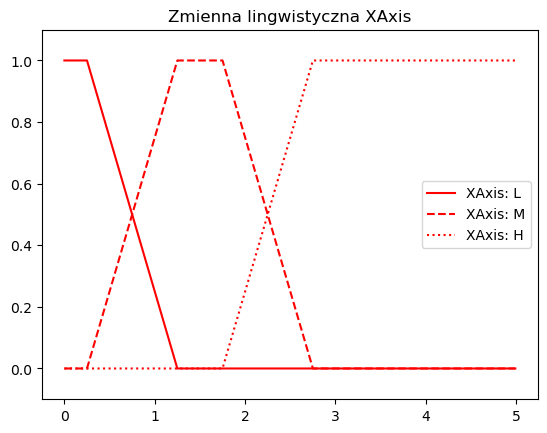

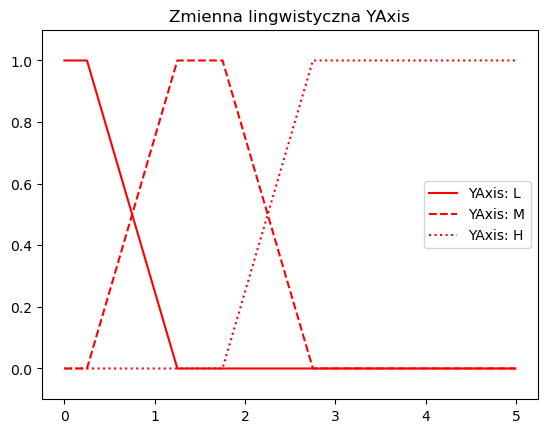

In [38]:
varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.show()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   29.134873906569815
Liczba ew:  262246
Liczba it:  100
FIS premises [[1.54546455 1.09092977 0.96591143 0.83730962]
 [3.17455156 0.4188265  2.16170129 3.48428255]]
TIME elapsed:  91.04902529716492


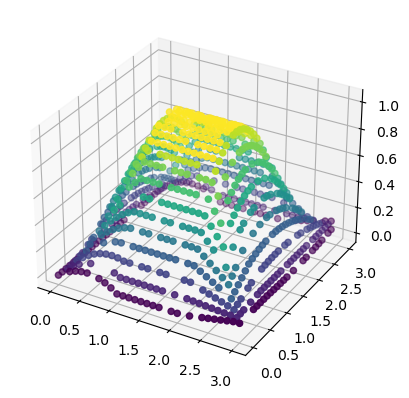

In [39]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

<H1>Zadanie</H1>

Zaimplementuj wszystkie operatory rozmyte pokazane w pliku "Najczęściej stosowane t-normy". Następnie użyj ich do uczenia powyższego systemu ANFIS, która z nich jest najlepsza, jak myślisz dlaczego?

In [40]:
%matplotlib auto

Using matplotlib backend: QtAgg


In [41]:
%matplotlib inline

In [42]:
def zadech_t(data, *args):
    return np.min(data, axis=0)

def zadech_s(data, *args):
    return np.max(data, axis=0)

def algebraic_t(data, *args):
    return data[0] * data[1]

def probabilistic_s(data, *args):
    return data[0] + data[1] - data[0] * data[1]

def lukasiewicz_t(data, *args):
    return np.max((data[0] + data[1] - 1, np.zeros_like(data)[0]), axis=0)

def lukasiewicz_s(data, *args):
    return np.min((data[0] + data[1], np.ones_like(data)[0]), axis=0)

def fodor_t(data, *args):
    return np.min(data, axis=0) if np.max(data[0] + data[1]) > 1 else np.zeros_like(data[0])

def fodor_s(data, *args):
    return np.max(data, axis=0) if np.max(data[0] + data[1]) < 1 else np.ones_like(data[0])

def drastic_t(data, *args):
    return np.zeros(data[0].shape) if np.max(data) < 1 else np.min(data, axis=0)

def drastic_s(data, *args):
    return np.ones(data[0].shape) if np.min(data) > 0 else np.max(data, axis=0)

def einstein_t(data, *args):
    return data[0] * data[1] / (2 - (data[0] + data[1] - data[0] * data[1]))

def einstein_s(data, *args):
    return (data[0] + data[1]) / (1 + data[0] * data[1])

def my_t(data, *args):
    return (data[0] * data[1]) * np.min(data, axis=0)

def my_s(data, *args):
    return 1 - my_t(np.array((1-data[0], 1-data[1])), args)


In [43]:
functions = {
    "zadech_t": zadech_t,
    "zadech_s": zadech_s,
    "algebraic_t": algebraic_t,
    "probabilistic_s": probabilistic_s,
    "lukasiewicz_t": lukasiewicz_t,
    "lukasiewicz_s": lukasiewicz_s,
    "fodor_t": fodor_t,
    "fodor_s": fodor_s,
    "drastic_t": drastic_t,
    "drastic_s": drastic_s,
    "einstein_t": einstein_t,
    "einstein_s": einstein_s,
    "my_t": my_t,
    "my_s": my_s,
}

In [44]:
def test_norm(op_func, plot_title):
    x = np.arange(0, 3.1, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = []
    for x, y in zip(dataX, dataY):
        x-=1.5
        y-=1.5
        data_labels.append( abs(x) if (y<x and y>-x) or (y>x and y<-x)  else abs(y) )
    data_labels=np.array(data_labels)
    #data_labels[data_labels>1.5] = 1.5
    data_labels=abs(data_labels-1.5)
    data_labels[data_labels>1] = 1

    varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
    varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

    fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=op_func)

    start = time.time()
    fis.train(True, True, False, True, n_iter=100)
    end = time.time()
    print("FIS premises", fis.premises)
    print("TIME elapsed: ", end - start)
    fis.training_data = X_train.T
    fis.expected_labels = y_train
    fis.show_results(y_train, title=plot_title)


Optymalizacja zakończona!
z blędem:   19.407201190649637
Liczba ew:  275685
Liczba it:  100
FIS premises [[1.47445054 1.05110123 0.03064135 0.99999884]
 [1.4999999  1.00000395 0.99999661 0.99999697]]
TIME elapsed:  95.85949778556824


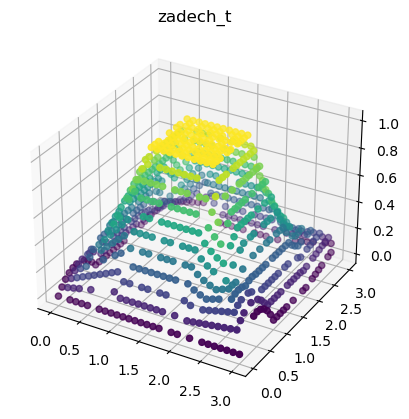

Optymalizacja zakończona!
z blędem:   103.75030553707288
Liczba ew:  143872
Liczba it:  100
FIS premises [[2.96818336 0.36387536 1.81284945 0.03150583]
 [3.45463915 1.36408797 1.79500555 1.56630179]]
TIME elapsed:  49.36248278617859


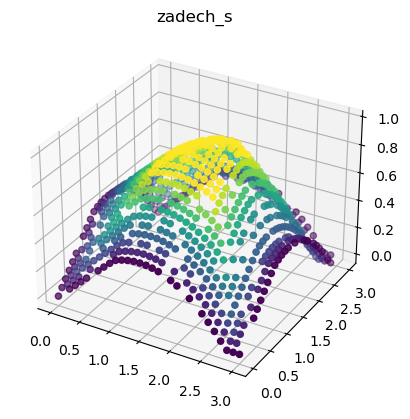

Optymalizacja zakończona!
z blędem:   28.552434162941168
Liczba ew:  262601
Liczba it:  100
FIS premises [[0.39843773 0.80313871 2.58547428 2.17498843]
 [1.54062603 1.08125126 0.95674897 0.8962297 ]]
TIME elapsed:  93.97598171234131


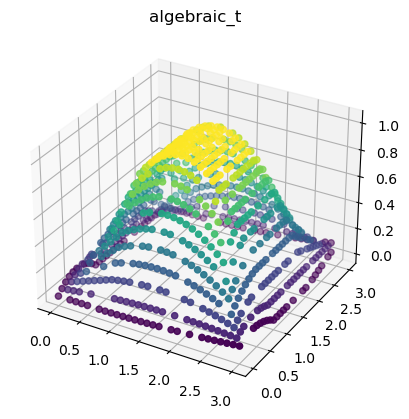

Optymalizacja zakończona!
z blędem:   110.22757714983126
Liczba ew:  196399
Liczba it:  100
FIS premises [[2.89775778 0.27705447 1.50885778 3.5384609 ]
 [0.06326472 2.77355688 3.35433036 1.24995588]]
TIME elapsed:  73.7989993095398


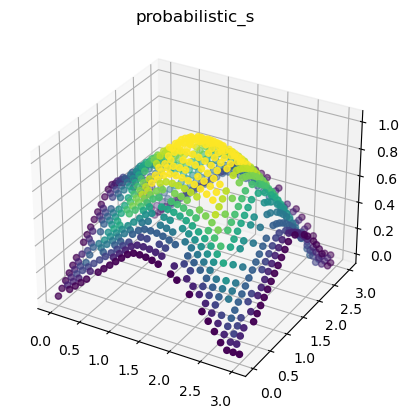

E:\!SIiUM2\MSI\ANFIS.py:90: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   46.65603076636153
Liczba ew:  270499
Liczba it:  100
FIS premises [[1.60784317 1.649621   0.12261609 0.11614219]
 [3.28616173 0.69948153 2.12713908 3.27373877]]
TIME elapsed:  112.8620011806488


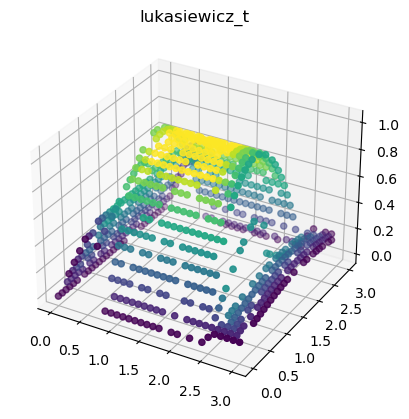

Optymalizacja zakończona!
z blędem:   113.23442452970016
Liczba ew:  207636
Liczba it:  100
FIS premises [[0.14130197 2.41819258 3.98574651 1.43896516]
 [0.79869914 1.89777737 2.99308872 0.9253165 ]]
TIME elapsed:  85.55002069473267


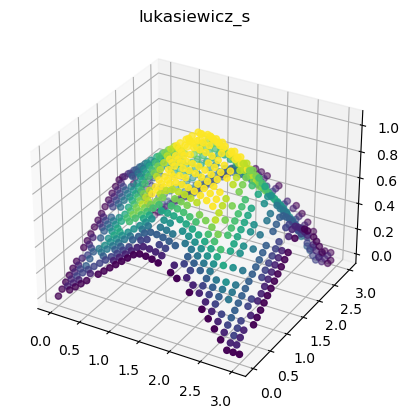

Optymalizacja zakończona!
z blędem:   19.769767077133118
Liczba ew:  314359
Liczba it:  100
FIS premises [[1.50000014 1.0000002  0.9999999  0.99999953]
 [1.44672553 1.10654885 0.08077804 0.99999918]]
TIME elapsed:  123.5785174369812


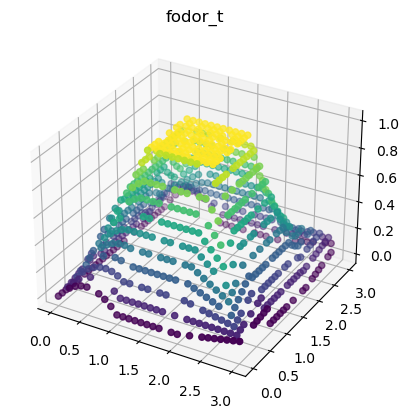

Optymalizacja zakończona!
z blędem:   221.3000000022535
Liczba ew:  54289
Liczba it:  100
FIS premises [[1.18331674e+00 6.89323741e-01 4.72831420e-16 4.25137441e-02]
 [1.47994614e+00 5.04582528e-01 1.82182371e+00 2.10248953e-16]]
TIME elapsed:  20.615002155303955


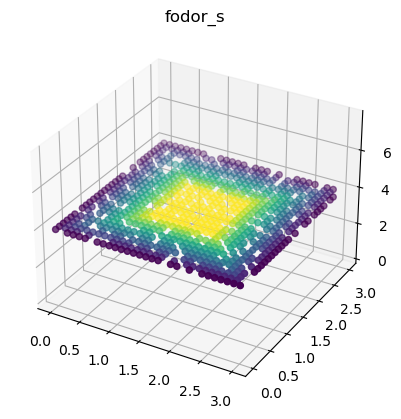

Optymalizacja zakończona!
z blędem:   22.971375242853703
Liczba ew:  266226
Liczba it:  100
FIS premises [[0.84760149 0.         2.63004617 2.11144502]
 [1.54978316 1.16570168 0.83346893 0.71935621]]
TIME elapsed:  100.17897295951843


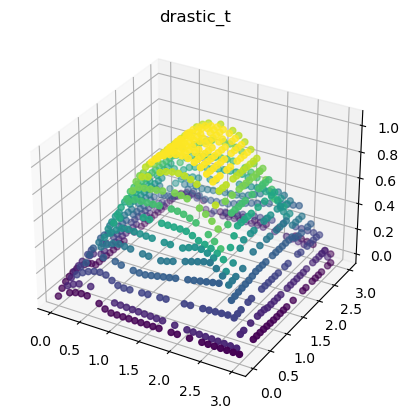

Optymalizacja zakończona!
z blędem:   103.75030573635826
Liczba ew:  148525
Liczba it:  100
FIS premises [[3.69695352 1.82145443 1.81280624 3.83791426]
 [3.57667142 1.6081512  1.79498432 3.72770507]]
TIME elapsed:  55.03350019454956


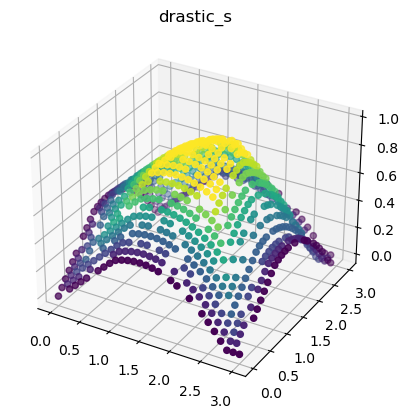

Optymalizacja zakończona!
z blędem:   32.77200061649517
Liczba ew:  260169
Liczba it:  100
FIS premises [[1.54552442 1.08774096 0.96719331 0.90355776]
 [3.48823869 1.06531443 2.15225634 3.99838786]]
TIME elapsed:  101.99499917030334


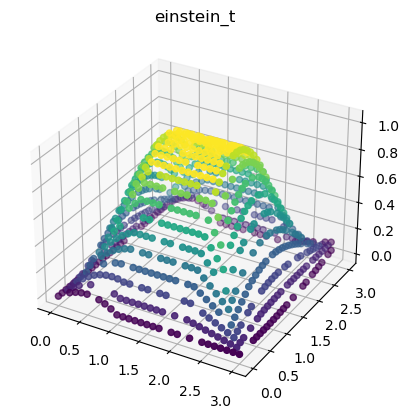

Optymalizacja zakończona!
z blędem:   111.19534403595252
Liczba ew:  170165
Liczba it:  100
FIS premises [[0.25857127 2.01291141 3.70867903 1.51245948]
 [0.38426553 2.27110881 3.90491099 1.17810057]]
TIME elapsed:  65.35100245475769


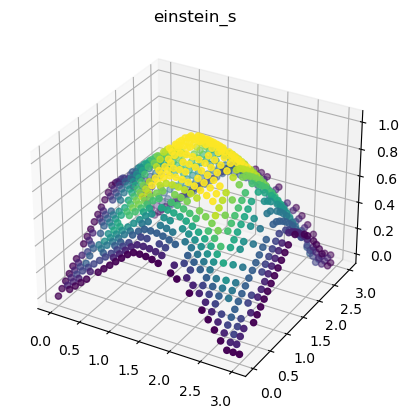

Optymalizacja zakończona!
z blędem:   38.77637909469496
Liczba ew:  232415
Liczba it:  100
FIS premises [[1.57924008 0.6699239  1.385799   1.21974075]
 [3.89890777 0.36593103 3.69492968 2.25710153]]
TIME elapsed:  87.84850025177002


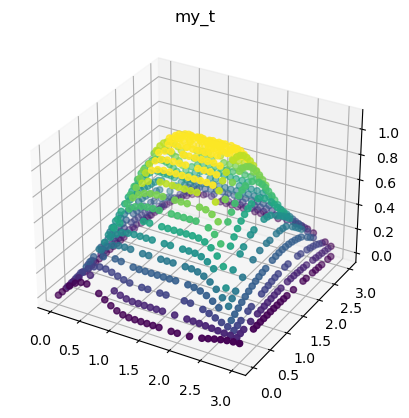

Optymalizacja zakończona!
z blędem:   114.59325190475249
Liczba ew:  190189
Liczba it:  100
FIS premises [[2.62213963e+00 1.82633150e-11 1.22443532e+00 4.00000000e+00]
 [4.68228785e-01 2.04432679e+00 3.22484388e+00 1.10316306e+00]]
TIME elapsed:  79.15251779556274


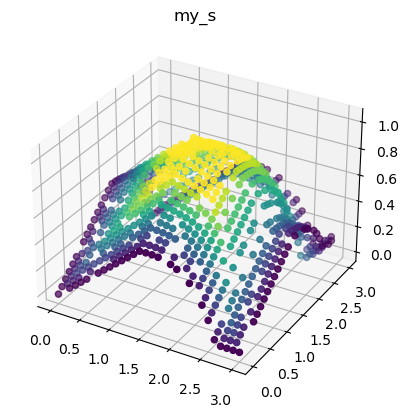

In [45]:
for f_name, op_func in functions.items():
    test_norm(op_func, f_name)